# ***Mounting Drive***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***Loading the Dataset***

In [2]:
import pandas as pd
import numpy as np

trueData = '/content/drive/MyDrive/Btech_project/True.csv'
fakeData = '/content/drive/MyDrive/Btech_project/Fake.csv'

true_Df = pd.read_csv(trueData)
fake_Df = pd.read_csv(fakeData)

In [3]:
display(fake_Df)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [4]:
display(true_Df)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


# ***Word Cloud for Real News***

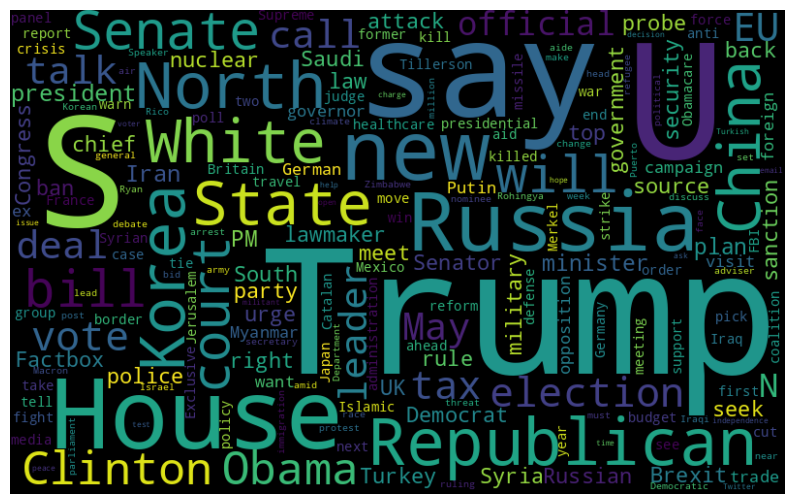

In [5]:
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt


real_Titles = true_Df.title
real_allWords = ' '.join(real_Titles)
real_WordCloud = WordCloud(background_color='Black',
    width= 800, height= 500,
    max_font_size = 180,
    collocations = False).generate(real_allWords)

plt.figure(figsize=(10,7))
plt.imshow(real_WordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# ***Word Cloud for Fake News***

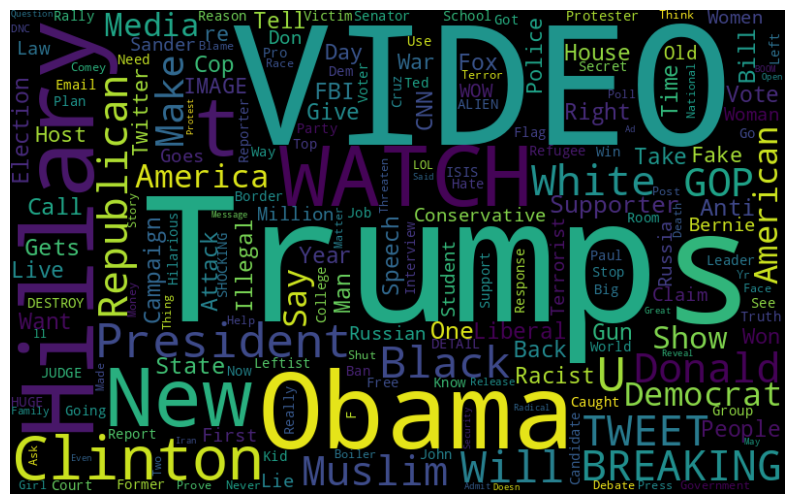

In [6]:
fake_Titles = fake_Df.title
fake_allWords = ' '.join(fake_Titles)
fake_WordCloud = WordCloud(background_color='Black',
    width= 800, height= 500,
    max_font_size = 180,
    collocations = False).generate(fake_allWords)

plt.figure(figsize=(10,7))
plt.imshow(fake_WordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# ***Data Visualisation***

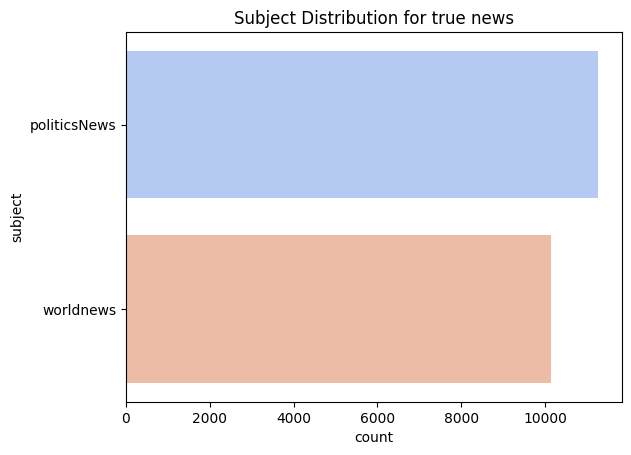

In [7]:
sns.countplot(y="subject", palette="coolwarm", data=true_Df).set_title('Subject Distribution for true news')
plt.show()

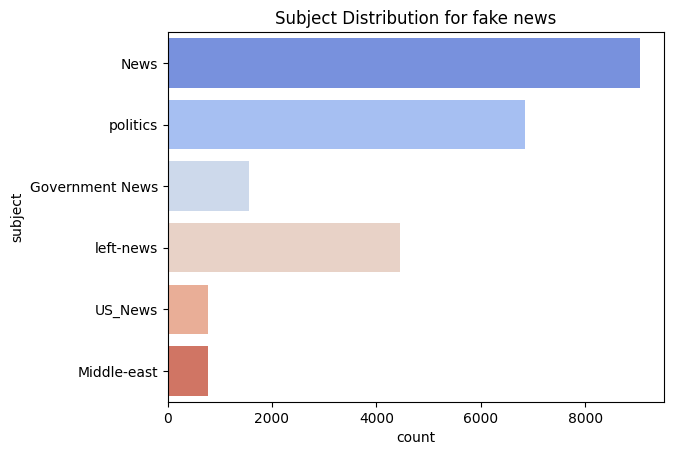

In [8]:
sns.countplot(y="subject", palette="coolwarm", data=fake_Df).set_title('Subject Distribution for fake news')
plt.show()

# ***Data Preprocessing***

## ***Data Combination***

In [9]:
true_Df['label'] = 1
fake_Df['label'] = 0


df = pd.concat([true_Df, fake_Df])
display(df)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


## ***Inspecting Length of News Titles***

In [10]:
titles = [text for text in df.title]

max_len = 0
titles_len = []
for title in titles:
    titles_len.append(len(title.split()))
    max_len = max(len(title.split()), max_len)

print('Number of titles:', len(titles))
print('Max length of the titles:', max_len)
print('Mean length of the titles:', np.mean(titles_len))

Number of titles: 44898
Max length of the titles: 42
Mean length of the titles: 12.453472315025168


In [11]:
texts = [text for text in df.text]

max_len = 0
texts_len = []
for text in texts:
    texts_len.append(len(text.split()))
    max_len = max(len(text.split()), max_len)

print('Mean length of the texts:', np.mean(texts_len))

Mean length of the texts: 405.28228428883244


## ***Purifying and Shuffling the Dataframe***

In [12]:
from sklearn.utils import shuffle

# Purify
df = df.iloc[:,[0, -1]]

# Shuffle
df = shuffle(df).reset_index(drop=True)

display(df)

,title,label
0,BUSTED! OBAMA’S DOJ EXTORTS MONEY FROM BANKS T...,0
1,"Trump, without evidence, cites Ukraine ties to...",1
2,Factbox: Steps for removing a U.S. president f...,1
3,DEMOCRAT ALAN DERSHOWITZ Calls Out Court’s Rul...,0
4,Hungarian villagers in backlash against holida...,1
...,...,...
44893,PRESIDENT TRUMP’S NEW CHIEF OF STAFF Wants His...,0
44894,Case on Trump worker contract raises conflict ...,1
44895,WATCH CNN’S WOLF BLITZER PARTY With The Dems…S...,0
44896,Trump’s Attorney General Says THC Causes ‘Rea...,0


## ***Splitting data into Training, Validation and Testing***

In [13]:
train_validate_df = df.sample(frac = 0.8)
test_df = df.drop(train_validate_df.index)

train_df = train_validate_df.sample(frac = 0.8)
validation_df = train_validate_df.drop(train_df.index)

# Reset Index
train_df = train_df.reset_index(drop=True)
validation_df = validation_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

print('train_dataset size:', train_df.shape)
print('validation_dataset size:', validation_df.shape)
print('testing_dataset size:', test_df.shape)

train_dataset size: (28734, 2)
validation_dataset size: (7184, 2)
testing_dataset size: (8980, 2)


## ***DataFrame to CSV***

In [14]:
train_df.to_csv('train.tsv', sep='\t', index=False)
validation_df.to_csv('val.tsv', sep='\t', index=False)
test_df.to_csv('test.tsv', sep='\t', index=False)

## ***Concatenating all DataFrames***

In [15]:
df = pd.concat([train_df, validation_df, test_df])
df.to_csv('non.csv',index=False)

## ***Performing Data Cleaning***

In [16]:
import nltk
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [17]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df = pd.read_csv('non.csv')

def lemmatize_word(word):
    return lemmatizer.lemmatize(word, pos='v')

df['lemmatized_column'] = df['title'].apply(lambda x: ' '.join([lemmatize_word(word) for word in x.split()]))

df.to_csv('lemmatized.csv', index=False)

In [18]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [19]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [20]:
import gensim

In [21]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
            
    return result

In [22]:
df = pd.read_csv('lemmatized.csv')
df['clean'] = df['lemmatized_column'].apply(preprocess)
df

,title,label,lemmatized_column,clean
0,Guatemalan president survives congressional vo...,1,Guatemalan president survive congressional vot...,"[guatemalan, president, survive, congressional..."
1,Cuba holds municipal elections on road to Cast...,1,Cuba hold municipal elections on road to Castr...,"[cuba, hold, municipal, elections, road, castro]"
2,Brazil detains Italian fugitive Battisti leavi...,1,Brazil detain Italian fugitive Battisti leave ...,"[brazil, detain, italian, fugitive, battisti, ..."
3,WATCH: Hypocrite Bill O’Reilly Accuses Libera...,0,WATCH: Hypocrite Bill O’Reilly Accuses Liberal...,"[watch, hypocrite, reilly, accuses, liberals, ..."
4,Tanzania president names tax expert as central...,1,Tanzania president name tax expert as central ...,"[tanzania, president, expert, central, bank, g..."
...,...,...,...,...
44893,Obama's Argentina trip raises questions about ...,1,Obama's Argentina trip raise question about Ma...,"[obama, argentina, trip, raise, question, macr..."
44894,ICELAND’S STUNNING ELECTION OF ANTI-ESTABLISHM...,0,ICELAND’S STUNNING ELECTION OF ANTI-ESTABLISHM...,"[iceland, stunning, election, anti, establishm..."
44895,Britain will take a 'hard-headed' approach to ...,1,Britain will take a 'hard-headed' approach to ...,"[britain, hard, headed, approach, russia]"
44896,WATCH CNN’S WOLF BLITZER PARTY With The Dems…S...,0,WATCH CNN’S WOLF BLITZER PARTY With The Dems…S...,"[watch, wolf, blitzer, party, dems, swigs, win..."


## ***Obtaining the total words present in the Dataset***

In [23]:
list_of_words = []
for i in df.clean:
    for j in i:
        list_of_words.append(j)

total_words = len(list(set(list_of_words)))
total_words

18490

In [24]:
pip list | grep tensorflow

tensorflow                    2.12.0
tensorflow-datasets           4.8.3
tensorflow-estimator          2.12.0
tensorflow-gcs-config         2.12.0
tensorflow-hub                0.13.0
tensorflow-io-gcs-filesystem  0.32.0
tensorflow-metadata           1.13.1
tensorflow-probability        0.19.0


## ***Preparing the Data by Perfroming Tokenization, Padding and Word Embedding***

In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout, BatchNormalization
import numpy as np

In [26]:
# Load the data
train_data = pd.read_csv('train.tsv', delimiter='\t')
test_data = pd.read_csv('test.tsv', delimiter='\t')
validation_data = pd.read_csv('val.tsv', delimiter='\t')

In [27]:
# Creating A Tokenizer To Tokenize The Words And Create Sequences Of Tokenized Words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(train_df['title'])

# Convert the texts to sequences
train_sequences = tokenizer.texts_to_sequences(train_data['title'])
validation_sequences = tokenizer.texts_to_sequences(validation_data['title'])
test_sequences = tokenizer.texts_to_sequences(test_data['title'])

In [28]:
# Get the maximum sequence length
max_sequence_length = max(len(seq) for seq in train_sequences)
max_sequence_length


44

In [29]:
# Pad the sequences
train_padded = pad_sequences(train_sequences, maxlen=max_sequence_length, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=max_sequence_length, padding='post', truncating='post')
validation_padded = pad_sequences(validation_sequences, maxlen=max_sequence_length, padding='post', truncating='post')

In [30]:
# Define the embedding dimension
embedding_dim = 100

# Load the GloVe embeddings
embeddings_index = {}
glove_file = '/content/drive/MyDrive/Btech_project/glove.6B.100d.txt'
with open(glove_file, encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

f.close()

In [31]:
# Create the embedding matrix
word_index = tokenizer.word_index
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [32]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Input, Dense, Flatten, Conv1D, MaxPooling1D, LSTM, Bidirectional, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# ***CNN-Bi-LSTM***

# ***Building and Training CNN-Bi-LSTM***

In [34]:
from keras.regularizers import l2

input_layer = Input(shape=(max_sequence_length,), dtype='int32')
embedding_layer = Embedding(num_words, embedding_dim, weights=[embedding_matrix], input_length=max_sequence_length)(input_layer)
embedding_dropout_layer = Dropout(0.5)(embedding_layer)
conv_layer = Conv1D(filters=16, kernel_size=3, padding='same', activation='relu')(embedding_dropout_layer)
conv_dropout_layer = Dropout(0.5)(conv_layer)
pool_layer = MaxPooling1D(pool_size=2)(conv_dropout_layer)
bilstm_layer = Bidirectional(LSTM(units=32, dropout=0.5, recurrent_dropout=0.5))(pool_layer)
bilstm_dropout_layer = Dropout(0.5)(bilstm_layer)
output_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01))(bilstm_dropout_layer)
cnn_bilstm_model = Model(inputs=input_layer, outputs=output_layer)

In [35]:
#Compile the CNN-BiLSTM model
cnn_bilstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
print(cnn_bilstm_model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 44)]              0         
                                                                 
 embedding (Embedding)       (None, 44, 100)           2679300   
                                                                 
 dropout (Dropout)           (None, 44, 100)           0         
                                                                 
 conv1d (Conv1D)             (None, 44, 16)            4816      
                                                                 
 dropout_1 (Dropout)         (None, 44, 16)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 22, 16)           0         
 )                                                               
                                                             

In [37]:
#Train the CNN-BiLSTM model
cnn_bilstm_model.fit(train_padded, train_data['label'], validation_data=(validation_padded, validation_data['label']), epochs=15, batch_size=32)

Epoch 1/15
898/898 [==============================] - 112s 109ms/step - loss: 0.3126 - accuracy: 0.8692 - val_loss: 0.1658 - val_accuracy: 0.9406
Epoch 2/15
898/898 [==============================] - 94s 105ms/step - loss: 0.1750 - accuracy: 0.9390 - val_loss: 0.1231 - val_accuracy: 0.9571
Epoch 3/15
898/898 [==============================] - 94s 105ms/step - loss: 0.1335 - accuracy: 0.9559 - val_loss: 0.1122 - val_accuracy: 0.9649
Epoch 4/15
898/898 [==============================] - 95s 106ms/step - loss: 0.1097 - accuracy: 0.9642 - val_loss: 0.1009 - val_accuracy: 0.9669
Epoch 5/15
898/898 [==============================] - 125s 139ms/step - loss: 0.0926 - accuracy: 0.9708 - val_loss: 0.0909 - val_accuracy: 0.9702
Epoch 6/15
898/898 [==============================] - 98s 109ms/step - loss: 0.0842 - accuracy: 0.9745 - val_loss: 0.0892 - val_accuracy: 0.9724
Epoch 7/15
898/898 [==============================] - 105s 117ms/step - loss: 0.0738 - accuracy: 0.9781 - val_loss: 0.0974 - val

In [38]:

test_loss, test_acc = cnn_bilstm_model.evaluate(test_padded, test_data['label'])
print('Test accuracy:', test_acc)

281/281 [==============================] - 2s 9ms/step - loss: 0.0911 - accuracy: 0.9748
Test accuracy: 0.9748329520225525


In [39]:
# Define the LSTM model

input_layer = Input(shape=(max_sequence_length,), dtype='int32')
embedding_layer = Embedding(num_words, embedding_dim, weights=[embedding_matrix], input_length=max_sequence_length)(input_layer)
lstm_layer = LSTM(units=32, dropout=0.5, recurrent_dropout=0.5)(embedding_layer)
#lstm_dropout_layer = Dropout(0.5)(lstm_layer)
output_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01))(lstm_layer)
lstm_model = Model(inputs=input_layer, outputs=output_layer)

In [40]:
# Compile the LSTM model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
print(lstm_model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 44)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 44, 100)           2679300   
                                                                 
 lstm_1 (LSTM)               (None, 32)                17024     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,696,357
Trainable params: 2,696,357
Non-trainable params: 0
_________________________________________________________________
None


In [42]:
#Train the LSTM model
lstm_model.fit(train_padded, train_data['label'], validation_data=(validation_padded, validation_data['label']), epochs=15, batch_size=32)

Epoch 1/15
898/898 [==============================] - 108s 115ms/step - loss: 0.2670 - accuracy: 0.8969 - val_loss: 0.1469 - val_accuracy: 0.9549
Epoch 2/15
898/898 [==============================] - 101s 113ms/step - loss: 0.1361 - accuracy: 0.9595 - val_loss: 0.1189 - val_accuracy: 0.9610
Epoch 3/15
898/898 [==============================] - 100s 112ms/step - loss: 0.0935 - accuracy: 0.9748 - val_loss: 0.1234 - val_accuracy: 0.9575
Epoch 4/15
898/898 [==============================] - 99s 110ms/step - loss: 0.0722 - accuracy: 0.9814 - val_loss: 0.1032 - val_accuracy: 0.9683
Epoch 5/15
898/898 [==============================] - 99s 111ms/step - loss: 0.0547 - accuracy: 0.9877 - val_loss: 0.1061 - val_accuracy: 0.9681
Epoch 6/15
898/898 [==============================] - 98s 109ms/step - loss: 0.0468 - accuracy: 0.9903 - val_loss: 0.1049 - val_accuracy: 0.9698
Epoch 7/15
898/898 [==============================] - 100s 112ms/step - loss: 0.0420 - accuracy: 0.9907 - val_loss: 0.1171 - va

In [43]:
test_loss, test_acc = lstm_model.evaluate(test_padded, test_data['label'])
print('Test accuracy:', test_acc)

281/281 [==============================] - 3s 9ms/step - loss: 0.1358 - accuracy: 0.9697
Test accuracy: 0.9697104692459106


In [44]:
#Define Bilstm model
input_layer = Input(shape=(max_sequence_length,), dtype='int32')
embedding_layer = Embedding(num_words, embedding_dim, weights=[embedding_matrix], input_length=max_sequence_length)(input_layer)
lstm_layer = Bidirectional(LSTM(units=32, dropout=0.5, recurrent_dropout=0.5))(embedding_layer)
#lstm_dropout_layer = Dropout(0.5)(lstm_layer)
output_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01))(lstm_layer)
bilstm_model = Model(inputs=input_layer, outputs=output_layer)

In [45]:
bilstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [46]:
print(bilstm_model.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 44)]              0         
                                                                 
 embedding_2 (Embedding)     (None, 44, 100)           2679300   
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               34048     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,713,413
Trainable params: 2,713,413
Non-trainable params: 0
_________________________________________________________________
None


In [47]:
bilstm_model.fit(train_padded, train_data['label'], validation_data=(validation_padded, validation_data['label']), epochs=15, batch_size=32)

Epoch 1/15
898/898 [==============================] - 159s 169ms/step - loss: 0.2170 - accuracy: 0.9178 - val_loss: 0.1242 - val_accuracy: 0.9564
Epoch 2/15
898/898 [==============================] - 150s 167ms/step - loss: 0.1043 - accuracy: 0.9687 - val_loss: 0.1179 - val_accuracy: 0.9619
Epoch 3/15
898/898 [==============================] - 149s 166ms/step - loss: 0.0713 - accuracy: 0.9808 - val_loss: 0.1009 - val_accuracy: 0.9716
Epoch 4/15
898/898 [==============================] - 151s 169ms/step - loss: 0.0540 - accuracy: 0.9868 - val_loss: 0.0924 - val_accuracy: 0.9737
Epoch 5/15
898/898 [==============================] - 149s 166ms/step - loss: 0.0401 - accuracy: 0.9911 - val_loss: 0.1019 - val_accuracy: 0.9740
Epoch 6/15
898/898 [==============================] - 151s 169ms/step - loss: 0.0333 - accuracy: 0.9935 - val_loss: 0.0966 - val_accuracy: 0.9737
Epoch 7/15
898/898 [==============================] - 149s 165ms/step - loss: 0.0288 - accuracy: 0.9950 - val_loss: 0.0990 -

In [48]:
test_loss, test_acc = bilstm_model.evaluate(test_padded, test_data['label'])
print('Test accuracy:', test_acc)

281/281 [==============================] - 4s 15ms/step - loss: 0.1167 - accuracy: 0.9689
Test accuracy: 0.9689309597015381
